# Step 0. 데이터 load

In [1]:
data = open('data/corpus_data/wiki_20190620_small.txt', 'r', encoding='utf-8')

lines = data.readlines()

In [2]:
for i in range(0, 5):
    print(lines[i])

제임스 얼 "지미" 카터 주니어(, 1924년 10월 1일 ~ )는 민주당 출신 미국 39번째 대통령 (1977년 ~ 1981년)이다.

지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다. 조지아 공과대학교를 졸업하였다. 그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다. 1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다. 그의 별명이 "땅콩 농부" (Peanut Farmer)로 알려졌다.

1962년 조지아 주 상원 의원 선거에서 낙선하나 그 선거가 부정선거 였음을 입증하게 되어 당선되고, 1966년 조지아 주 지사 선거에 낙선하지만 1970년 조지아 주 지사를 역임했다. 대통령이 되기 전 조지아주 상원의원을 두번 연임했으며, 1971년부터 1975년까지 조지아 지사로 근무했다. 조지아 주지사로 지내면서, 미국에 사는 흑인 등용법을 내세웠다.

1976년 대통령 선거에 민주당 후보로 출마하여 도덕주의 정책으로 내세워, 포드를 누르고 당선되었다.

카터 대통령은 에너지 개발을 촉구했으나 공화당의 반대로 무산되었다.



# Step 1. 문장 분리 실습

In [3]:
import kss

In [4]:
for i in range(0, 5):
    ori_line = lines[i]
    for sent in kss.split_sentences(ori_line):
        print(sent)

제임스 얼 "지미" 카터 주니어(, 1924년 10월 1일 ~ )는 민주당 출신 미국 39번째 대통령 (1977년 ~ 1981년)이다.
지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다.
조지아 공과대학교를 졸업하였다.
그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다.
1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다.
그의 별명이 "땅콩 농부" (Peanut Farmer)로 알려졌다.
1962년 조지아 주 상원 의원 선거에서 낙선하나 그 선거가 부정선거 였음을 입증하게 되어 당선되고, 1966년 조지아 주 지사 선거에 낙선하지만 1970년 조지아 주 지사를 역임했다.
대통령이 되기 전 조지아주 상원의원을 두번 연임했으며, 1971년부터 1975년까지 조지아 지사로 근무했다.
조지아 주지사로 지내면서, 미국에 사는 흑인 등용법을 내세웠다.
1976년 대통령 선거에 민주당 후보로 출마하여 도덕주의 정책으로 내세워, 포드를 누르고 당선되었다.
카터 대통령은 에너지 개발을 촉구했으나 공화당의 반대로 무산되었다.


In [5]:
# 문장 분리한 데이터 저장
output = open('data/corpus_data/sentence_tokenized_wiki_20190620_small.txt', 'w', encoding='utf-8')

for line in lines:
    line = line.strip()
    for sent in kss.split_sentences(line):
        output.write(sent + '\n')

output.close()

# Step 2. 형태소 분리 실습

In [ ]:
from khaiii import KhaiiiApi
api = KhaiiiApi()
for word in api.analyze('안녕, 세상.'):
    print(word)

# Step 3. BPE 분리 실습

In [13]:
!mkdir bpe_tokenizer

In [14]:
import tokenizers as tk

path = 'data/corpus_data/sentence_tokenized_wiki_20190620_small.txt'
tokenizer = tk.SentencePieceBPETokenizer()
tokenizer.train(files=path, vocab_size=3000, min_frequency=1, special_tokens=[
    "<unk>"
])

tokenizer.save("bpe_tokenizer", "")

['bpe_tokenizer/-vocab.json', 'bpe_tokenizer/-merges.txt']

In [17]:
from tokenizers.processors import BertProcessing
from new_tokenizer import MyTokenizer

vocab_file_path = 'bpe_tokenizer/-vocab.json'
merge_file_path = 'bpe_tokenizer/-merges.txt'

tokenizer = MyTokenizer(vocab_file_path, merge_file_path)
sos = tokenizer.convert_tokens_to_ids('<s>')
eos = tokenizer.convert_tokens_to_ids('</s>')

def tokenizing(text):
    return tokenizer.tokenize(text)

result = tokenizing("이순신은 조선 중기의 무신이다.")
print(result)


['▁이', '순', '신', '은', '▁조선', '▁중', '기', '의', '▁무', '신', '이다.']


# Step 4. 자소 분리 실습

In [1]:
import hgtk

In [2]:
hgtk.text.decompose('학교종이 땡땡땡! hello world 1234567890 ㅋㅋ!')

'ㅎㅏㄱᴥㄱㅛᴥㅈㅗㅇᴥㅇㅣᴥ ㄸㅐㅇᴥㄸㅐㅇᴥㄸㅐㅇᴥ! hello world 1234567890 ㅋᴥㅋᴥ!'

In [3]:
hgtk.text.compose('ㅎㅏㄱᴥㄱㅛᴥㅈㅗㅇᴥㅇㅣᴥ ㄸㅐㅇᴥㄸㅐㅇᴥㄸㅐㅇᴥ! hello world 1234567890 ㅋᴥㅋᴥ!')

'학교종이 땡땡땡! hello world 1234567890 ㅋㅋ!'

# Step 5. 한국어 분석 실습

In [4]:
hgtk.checker.is_hangul('한글입니다')

True

In [5]:
hgtk.checker.is_hangul('no한글입니다')

False

In [6]:
hgtk.checker.is_hanja('大韓民國')

True

In [7]:
hgtk.checker.is_hanja('大한민국')

False

In [8]:
hgtk.checker.has_batchim('한') 

True

In [9]:
hgtk.checker.has_batchim('하')

False

In [12]:
print(hgtk.josa.attach('하늘', hgtk.josa.EUN_NEUN))
print(hgtk.josa.attach('바다', hgtk.josa.EUN_NEUN))
print(hgtk.josa.attach('하늘', hgtk.josa.I_GA))
print(hgtk.josa.attach('바다', hgtk.josa.I_GA))
print(hgtk.josa.attach('하늘', hgtk.josa.EUL_REUL))
print(hgtk.josa.attach('바다', hgtk.josa.EUL_REUL))
print(hgtk.josa.attach('하늘', hgtk.josa.GWA_WA))
print(hgtk.josa.attach('바다', hgtk.josa.GWA_WA))
print(hgtk.josa.attach('하늘', hgtk.josa.IDA_DA))
print(hgtk.josa.attach('바다', hgtk.josa.IDA_DA))
print(hgtk.josa.attach('하늘', hgtk.josa.EURO_RO))
print(hgtk.josa.attach('바다', hgtk.josa.EURO_RO))
print(hgtk.josa.attach('태양', hgtk.josa.EURO_RO))
print(hgtk.josa.attach('방어', hgtk.josa.RYUL_YUL))
print(hgtk.josa.attach('공격', hgtk.josa.RYUL_YUL))
print(hgtk.josa.attach('반환', hgtk.josa.RYUL_YUL))

하늘은
바다는
하늘이
바다가
하늘을
바다를
하늘과
바다와
하늘이다
바다다
하늘로
바다로
태양으로
방어율
공격률
반환율


# Step 6. 시각화

In [13]:
path = 'data/corpus_data/sentence_tokenized_wiki_20190620_small.txt'
data = open(path, 'r', encoding='utf-8')

lines = data.readlines()

vocabs = {}
for line in lines:
    tokens = line.strip().split(' ')
    for token in tokens:
        if token in vocabs:
            num = vocabs[token]
            vocabs[token] = num + 1
        else:
            vocabs[token] = 1

In [14]:
print(vocabs)

{'제임스': 2, '얼': 1, '"지미"': 1, '카터': 4, '주니어(,': 1, '1924년': 1, '10월': 2, '1일': 1, '~': 3, ')는': 1, '민주당': 2, '출신': 1, '미국': 11, '39번째': 1, '대통령': 5, '(1977년': 1, '1981년)이다.': 1, '지미': 2, '카터는': 5, '조지아주': 2, '섬터': 1, '카운티': 1, '플레인스': 1, '마을에서': 1, '태어났다.': 1, '조지아': 6, '공과대학교를': 1, '졸업하였다.': 1, '그': 19, '후': 5, '해군에': 1, '들어가': 1, '전함·원자력·잠수함의': 1, '승무원으로': 1, '일하였다.': 1, '1953년': 1, '해군': 1, '대위로': 1, '예편하였고': 1, '이후': 6, '땅콩·면화': 1, '등을': 6, '가꿔': 1, '많은': 16, '돈을': 1, '벌었다.': 1, '그의': 2, '별명이': 1, '"땅콩': 1, '농부"': 1, '(Peanut': 1, 'Farmer)로': 1, '알려졌다.': 2, '1962년': 1, '주': 6, '상원': 1, '의원': 1, '선거에서': 2, '낙선하나': 1, '선거가': 1, '부정선거': 1, '였음을': 1, '입증하게': 1, '되어': 3, '당선되고,': 1, '1966년': 1, '지사': 1, '선거에': 2, '낙선하지만': 1, '1970년': 1, '지사를': 1, '역임했다.': 1, '대통령이': 2, '되기': 1, '전': 2, '상원의원을': 1, '두번': 1, '연임했으며,': 1, '1971년부터': 1, '1975년까지': 1, '지사로': 1, '근무했다.': 1, '주지사로': 1, '지내면서,': 1, '미국에': 1, '사는': 1, '흑인': 1, '등용법을': 1, '내세웠다.': 3, '1976년': 1, '후보로': 1, '출마하여': 1, '도덕주의': 1, '정

In [15]:
import matplotlib as mpl
import matplotlib.font_manager as fm

fm._rebuild()
mpl.rc('font', family="NanumBarunGothic")

import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud

In [16]:
path = 'data/corpus_data/sentence_tokenized_wiki_20190620_small.txt'

data = open(path, 'r', encoding='utf-8').read()

In [17]:
wordcloud = WordCloud().generate(data)

In [18]:
wordcloud.words_

{'있다': 1.0,
 '한다': 0.375,
 '또한': 0.32142857142857145,
 '화학': 0.32142857142857145,
 '많은': 0.2857142857142857,
 '대한': 0.26785714285714285,
 '위해': 0.25,
 '다루는': 0.25,
 '다른': 0.25,
 '미국': 0.19642857142857142,
 '물질을': 0.19642857142857142,
 '등의': 0.17857142857142858,
 '같은': 0.17857142857142858,
 '고대': 0.17857142857142858,
 '그리고': 0.17857142857142858,
 '또는': 0.17857142857142858,
 '화합물을': 0.17857142857142858,
 '유기': 0.17857142857142858,
 '그는': 0.16071428571428573,
 '수학의': 0.16071428571428573,
 '매우': 0.16071428571428573,
 '중요한': 0.14285714285714285,
 '대해': 0.14285714285714285,
 '수학': 0.14285714285714285,
 '이는': 0.125,
 '수학은': 0.125,
 '않는': 0.125,
 '이러한': 0.125,
 '것이': 0.125,
 '있으며': 0.125,
 '물질의': 0.125,
 '원자': 0.125,
 '화학의': 0.125,
 '체첸': 0.125,
 '조지아': 0.10714285714285714,
 '이후': 0.10714285714285714,
 '등을': 0.10714285714285714,
 '그러나': 0.10714285714285714,
 '되었다': 0.10714285714285714,
 '연구하는': 0.10714285714285714,
 '것을': 0.10714285714285714,
 '수도': 0.10714285714285714,
 '모든': 0.10714285714285

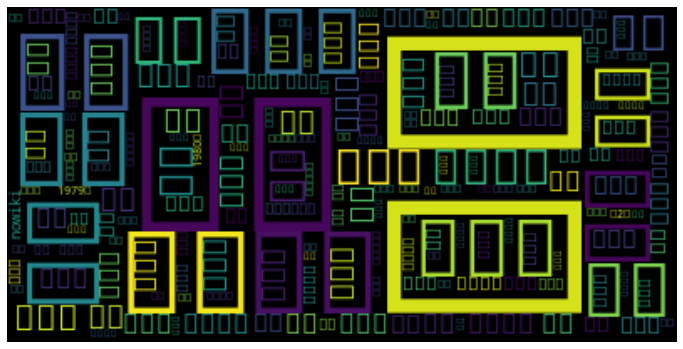

In [19]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Step 7. One-hot vector

In [21]:
import numpy as np
tokens = lines[0].strip().split(' ')
vocabs = sorted(set(tokens))

In [22]:
vocabs

['"지미"',
 '(1977년',
 ')는',
 '10월',
 '1924년',
 '1981년)이다.',
 '1일',
 '39번째',
 '~',
 '대통령',
 '미국',
 '민주당',
 '얼',
 '제임스',
 '주니어(,',
 '출신',
 '카터']

In [23]:
num_tokens = len(tokens)
vocab_size = len(vocabs)
onehot_vectors = np.zeros((num_tokens, vocab_size), int)

In [24]:
for i, word in enumerate(tokens):
    onehot_vectors[i, vocabs.index(word)] = 1

In [25]:
print(tokens)
print(onehot_vectors)

['제임스', '얼', '"지미"', '카터', '주니어(,', '1924년', '10월', '1일', '~', ')는', '민주당', '출신', '미국', '39번째', '대통령', '(1977년', '~', '1981년)이다.']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]]
